# Variational Autoencoder (VAE)

Variational Autoencoder (VAE), [arXiv:1312.6114 [stat.ML]](https://arxiv.org/abs/1312.6114)

$\beta$-VAE, [I. Higgins _et al_, β-VAE: Learning Basic Visual Concepts with a Constrained Variational Framework, ICLR, (2017).](https://openreview.net/forum?id=Sy2fzU9gl)

$\sigma$-VAE, [arXiv:2006.13202 [cs.LG]](https://arxiv.org/abs/2006.13202)

MCMC sampling, [arXiv:1610.09296 [cs.LG]](https://arxiv.org/abs/1610.09296)

Data $\boldsymbol{x}$ are generated by a random process involving latent continuous random variables $\boldsymbol{z}$. Encoder
$q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x})$ produces distribution over the possible values of $\boldsymbol{z}$ from which the datapoint $\boldsymbol{x}$ could have been generated. Decoder $p_{\boldsymbol{\theta}}(\boldsymbol{x}|\boldsymbol{z})$ produces a distribution over the possible values of $\boldsymbol{x}$ corresponding to $\boldsymbol{z}$. Marginal distribution of data is
$p_{\boldsymbol{\theta}}(\boldsymbol{x})=\int p(\boldsymbol{z})p_{\boldsymbol{\theta}}(\boldsymbol{x}|\boldsymbol{z})\,\mathrm{d}\boldsymbol{z}$. Marginal likelihood of datapoint $\boldsymbol{x}$ satisfies a lower bound
$$
\log p_{\boldsymbol{\theta}}(\boldsymbol{x})\geq
\mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x})}
\left[\log p_{\boldsymbol{\theta}}(\boldsymbol{x}|\boldsymbol{z})\right]
-D_{\mathrm{KL}}(q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x})||p(\boldsymbol{z}))\,.
$$
Here $D_{\mathrm{KL}}$ is the Kullback-Leibler divergence, the first term is the negative reconstruction loss.
The model is fitted to a given dataset by maximizing the evidence lower bound (ELBO) $\log p_{\boldsymbol{\theta}}(\boldsymbol{x})$.

Assuming that the prior over the latent variables is the centered isotropic multivariate Gaussian $p(\boldsymbol{z})=\mathcal{N}(\boldsymbol{z},\boldsymbol{0},\boldsymbol{I})$ and approximate posterior distribution of the latent variables $q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x})$ is a multivariate Gaussian, $q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x})=\mathcal{N}(\boldsymbol{z},\boldsymbol{\mu},\boldsymbol{\sigma}^{2}\boldsymbol{I})$, the KL divergence becomes
$$
D_{\mathrm{KL}}(q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x})||p(\boldsymbol{z}))=
-\frac{1}{2}\sum_{j=1}^{N_{\mathrm{latent}}}(1+\log\sigma_{j}^{2}-\mu_{j}^{2}-\sigma_{j}^{2})\,.
$$
Here $N_{\mathrm{latent}}$ is the number of latent variables.
If the distribution $p_{\boldsymbol{\theta}}(\boldsymbol{x}|\boldsymbol{z})$ is an isotropic Gaussian,
$p_{\boldsymbol{\theta}}(\boldsymbol{x}|\boldsymbol{z})=\mathcal{N}(\boldsymbol{x}, \boldsymbol{\mu}_{\boldsymbol{\theta}},\sigma_{\boldsymbol{\theta}}^2\boldsymbol{I})$, then
$$
-\log p_{\boldsymbol{\theta}}(\boldsymbol{x}|\boldsymbol{z})
=\frac{1}{2\sigma_{\boldsymbol{\theta}}^2}N_{\mathrm{data}}\mathrm{MSE}(\boldsymbol{\mu}_{\boldsymbol{\theta}},\boldsymbol{x})+
N_{\mathrm{data}}\log\sigma_{\boldsymbol{\theta}}\sqrt{2\pi}\,,
$$
where $N_{\mathrm{data}}$ is the dimensionality of $\boldsymbol{x}$.

The average $\mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x})}$ is estimated by sampling one value of $\boldsymbol{z}$.
Assuming that $\sigma_{\boldsymbol{\theta}}$ is constant, the loss function of the variational autoencoder takes the form
$$
\mathcal{L}(\boldsymbol{\theta},\boldsymbol{\phi},\boldsymbol{x})=
\mathrm{MSE}(\boldsymbol{\mu}_{\boldsymbol{\theta}},\boldsymbol{x})+
\frac{N_{\mathrm{latent}}}{N_{\mathrm{data}}}\mathbb{E}_{j}[D_{\mathrm{KL}}(q_{\boldsymbol{\phi}}(z_{j}|\boldsymbol{x})||p(z_{j}))]\,,
$$
In $\beta$-VAE the loss function is
$$
\mathcal{L}(\boldsymbol{\theta},\boldsymbol{\phi},\boldsymbol{x})=
\mathrm{MSE}(\boldsymbol{\mu}_{\boldsymbol{\theta}},\boldsymbol{x})+
\beta\frac{N_{\mathrm{latent}}}{N_{\mathrm{data}}}\mathbb{E}_{j}[D_{\mathrm{KL}}(q_{\boldsymbol{\phi}}(z_{j}|\boldsymbol{x})||p(z_{j}))]
$$
$\sigma$-VAE: the optimal $\sigma_{\boldsymbol{\theta}}$ that minimizes the reconstruction loss is
$\sigma^{{*}2}=\mathrm{MSE}(\boldsymbol{\mu}_{\boldsymbol{\theta}},\boldsymbol{x})$. The loss function becomes
$$
\mathcal{L}(\boldsymbol{\theta},\boldsymbol{\phi},\boldsymbol{x})=
\mathrm{MSE}(\boldsymbol{\mu}_{\boldsymbol{\theta}},\boldsymbol{x})+
2\sigma^{{*}2}\frac{N_{\mathrm{latent}}}{N_{\mathrm{data}}}\mathbb{E}_{j}[D_{\mathrm{KL}}(q_{\boldsymbol{\phi}}(z_{j}|\boldsymbol{x})||p(z_{j}))]
$$

## Configuration

Imports

In [1]:
from pathlib import Path
from functools import partial
from collections import defaultdict
import math
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision.utils as vision_utils

Configuration

In [2]:
DATA_DIR = Path("./data")
MODELS_DIR = Path("./models")

NUM_WORKERS = 8
BATCH_SIZE = 128

IMAGE_SIZE = 128
IMAGE_CHANNELS = 3
LATENT_CHANNELS = 16

EPOCHS = 40
LEARNING_RATE = 1e-2
WEIGHT_DECAY = 1e-2

In [3]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Loss

The loss function is
$$
\mathcal{L}(\boldsymbol{\theta},\boldsymbol{\phi},\boldsymbol{x})=
\mathrm{MSE}(\hat{\boldsymbol{x}},\boldsymbol{x})+
\beta\frac{N_{\mathrm{latent}}}{N_{\mathrm{data}}}\mathbb{E}_{j}\left[-\frac{1}{2}(1+\log\sigma_j^2-\mu_j^2-\sigma_j^2)\right]
$$

In [4]:
class VAELoss(nn.Module):
    def __init__(self, β=1):
        super().__init__()
        self.reconstruction_loss = nn.MSELoss()
        self.β = β
    
    def kld_loss(self, mu, log_var):
        kld = -0.5 * (1 + log_var - mu ** 2 - log_var.exp())
        loss = torch.mean(kld)
        return loss
    
    def forward(self, outputs, target):
        output, mu, log_var = outputs
        reconst_loss = self.reconstruction_loss(output, target)
        kld_loss = self.kld_loss(mu, log_var)
        
        d_inp = np.prod(output.shape[1:])
        d_latent = np.prod(mu.shape[1:])
        kld_weight = self.β * d_latent / d_inp
        
        loss = reconst_loss + kld_weight * kld_loss
        return {"loss": loss, "reconstruction loss": reconst_loss, "KLD": kld_loss}

## Model

We create fully convolutional encoder and decoder.

### Utilities

In [5]:
def init_model(model):
    for m in model.modules():
        if isinstance(m, (nn.Linear, nn.Conv2d, nn.ConvTranspose2d)):
            nn.init.kaiming_normal_(m.weight)
            if m.bias is not None: nn.init.zeros_(m.bias)
        elif isinstance(m, nn.BatchNorm2d):
            nn.init.ones_(m.weight)
            nn.init.zeros_(m.bias)

In [6]:
class ConvBlock(nn.Sequential):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1):
        padding = (kernel_size - 1) // 2
        super().__init__(
            nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, padding=padding, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

In [7]:
class Stack(nn.Sequential):
    def __init__(self, channels_list, block):
        layers = []
        for in_channels, out_channels in zip(channels_list[:-1], channels_list[1:]):
            layers.append(block(in_channels, out_channels))
        super().__init__(*layers)

### VAE

Encoder

In [8]:
class DownBlock(nn.Sequential):
    def __init__(self, in_channels, out_channels):
        super().__init__(
            nn.MaxPool2d(2),
            ConvBlock(in_channels, out_channels, 3)
        )

In [9]:
class Encoder(nn.Module):
    def __init__(self, in_channels, channels_list, latent_channels):
        super().__init__()
        self.stem = ConvBlock(in_channels, channels_list[0], 3)
        self.blocks = Stack(channels_list, DownBlock)
        self.to_mu = nn.Conv2d(channels_list[-1], latent_channels, 3, padding=1)
        self.to_var = nn.Conv2d(channels_list[-1], latent_channels, 3, padding=1)
    
    def forward(self, x):
        x = self.stem(x)
        x = self.blocks(x)
        mu = self.to_mu(x)
        log_var = self.to_var(x)
        return mu, log_var

Decoder

In [10]:
class UpBlock(nn.Sequential):
    def __init__(self, in_channels, out_channels):
        super().__init__(
            nn.Upsample(scale_factor=2, mode='nearest'),
            ConvBlock(in_channels, out_channels, 3)
        )

In [11]:
class Decoder(nn.Module):
    def __init__(self, latent_channels, channels_list, out_channels):
        super().__init__()
        self.stem = ConvBlock(latent_channels, channels_list[0], 3)
        self.blocks = Stack(channels_list, UpBlock)
        self.to_output = nn.Conv2d(channels_list[-1], out_channels, 3, padding=1)
    
    def forward(self, x):
        x = self.stem(x)
        x = self.blocks(x)
        x = self.to_output(x)
        x = torch.sigmoid(x)
        return x

Full VAE

In [12]:
class VAE(nn.Module):
    def __init__(self, num_downsamplings, latent_channels, channels=32, in_channels=3):
        super().__init__()
        self.num_downsamplings = num_downsamplings
        self.latent_channels = latent_channels
        
        channels_list = [channels * 2**i for i in range(num_downsamplings + 1)]
        self.encoder = Encoder(in_channels, channels_list, latent_channels)
        channels_list.reverse()
        self.decoder = Decoder(latent_channels, channels_list, in_channels)
    
    def forward(self, x):
        mu, log_var = self.encoder(x)
        z = self.reparameterize(mu, log_var)
        out = self.decoder(z)
        return out, mu, log_var
    
    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + std * eps
    
    def sample(self, num_samples, shape, device, num_steps=0):
        reduction = 2**self.num_downsamplings
        z = torch.randn(num_samples, self.latent_channels, shape[0] // reduction, shape[1] // reduction, device=device)
        with torch.no_grad():
            # MCMC sampling
            for num in range(num_steps):
                x = self.decoder(z)
                mu, log_var = self.encoder(x)
                z = self.reparameterize(mu, log_var)
            out = self.decoder(z)
        return out

### Model creation

In [13]:
model = VAE(num_downsamplings=5, latent_channels=LATENT_CHANNELS, channels=16, in_channels=IMAGE_CHANNELS)

In [14]:
init_model(model)

In [15]:
model = model.to(DEVICE)

In [16]:
print("Number of parameters: {:,}".format(sum(p.numel() for p in model.parameters())))

Number of parameters: 3,368,771


## Data

In [17]:
train_transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.CenterCrop(IMAGE_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

In [18]:
val_transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.CenterCrop(IMAGE_SIZE),
    transforms.ToTensor()
])

In [19]:
train_dset = datasets.CelebA(str(DATA_DIR), split='train', transform=train_transform, download=False)
val_dset = datasets.CelebA(str(DATA_DIR), split='test', transform=val_transform, download=False)

In [20]:
train_loader = torch.utils.data.DataLoader(train_dset, batch_size=BATCH_SIZE, shuffle=True,
                                           num_workers=NUM_WORKERS)

val_loader = torch.utils.data.DataLoader(val_dset, batch_size=BATCH_SIZE, shuffle=False,
                                         num_workers=NUM_WORKERS)

In [21]:
def plot_batch(ax, batch, title=None, **kwargs):
    imgs = vision_utils.make_grid(batch, padding=2, normalize=True)
    imgs = np.moveaxis(imgs.numpy(), 0, -1)
    ax.set_axis_off()
    if title is not None: ax.set_title(title)
    return ax.imshow(imgs, **kwargs)

In [22]:
def show_images(batch, title):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    plot_batch(ax, batch, title)
    plt.show()

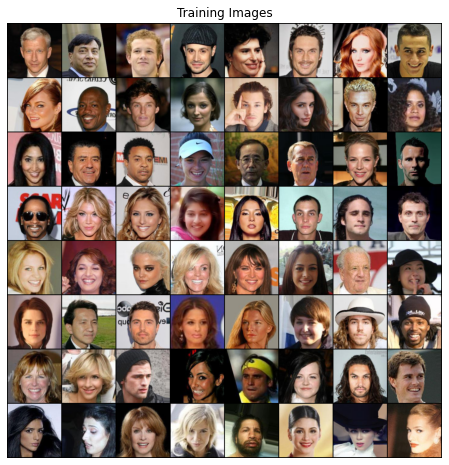

In [23]:
test_batch, _ = next(iter(train_loader))
show_images(test_batch[:64], "Training Images")

## Training

### Learner

In [24]:
class AverageLoss():
    def __init__(self, name):
        self.name = name
        self.reset()
    
    def reset(self):
        self.num_samples = 0
        self.total_loss = 0.
    
    def update(self, data):
        batch_size = data['batch_size']
        self.num_samples += batch_size
        self.total_loss += batch_size * data[self.name]
        
    def compute(self):
        avg_loss = self.total_loss / self.num_samples
        metrics = {self.name: avg_loss}
        return metrics

In [25]:
class Learner:
    def __init__(self, model, loss, optimizer, train_loader, val_loader, device,
                 batch_scheduler=None, epoch_scheduler=None):
        self.model = model
        self.loss = loss
        self.optimizer = optimizer
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.device = device
        self.batch_scheduler = batch_scheduler
        self.epoch_scheduler = epoch_scheduler
        self.history = defaultdict(list)
        self.metrics = [AverageLoss(x) for x in ["loss", "reconstruction loss", "KLD"]]
    
    def iterate(self, loader, train=False):
        for metric in self.metrics:
            metric.reset()
        
        for batch in loader:
            images = batch[0].to(self.device)
            outputs = self.model(images)
            losses = self.loss(outputs, images)
            
            if train: self.backward_pass(losses["loss"])
            
            data = {k: v.item() for k, v in losses.items()}
            data["batch_size"] = len(images)
            
            for metric in self.metrics:
                metric.update(data)
        
        summary = {}
        for metric in self.metrics:
            summary.update(metric.compute())
        return summary
    
    def backward_pass(self, batch_loss):
        self.optimizer.zero_grad()
        batch_loss.backward()
        self.optimizer.step()

        if self.batch_scheduler is not None:
            self.batch_scheduler.step()
    
    def log_metrics(self, metrics, name):
        print(f"{name}: ", end='', flush=True)
        for key, val in metrics.items():
            self.history[name + ' ' + key].append(val)
            print(f"{key} {val:.3f} ", end='')
    
    def train(self):
        self.model.train()
        metrics = self.iterate(self.train_loader, train=True)
        self.log_metrics(metrics, 'train')
    
    def validate(self):
        self.model.eval()
        with torch.no_grad():
            metrics = self.iterate(self.val_loader)
        self.log_metrics(metrics, 'val')
    
    def fit(self, epochs):
        for epoch in range(1, epochs + 1):
            print(f"{epoch}/{epochs} - ", end='')
            self.train()
            print('; ', end='')
            self.validate()
            print()
            if self.epoch_scheduler is not None:
                self.epoch_scheduler.step()
        
        torch.save(model.state_dict(), str(MODELS_DIR / 'final_model.pt'))

In [26]:
def plot_history_train_val(history, key):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    xs = np.arange(1, len(history['train ' + key]) + 1)
    ax.plot(xs, history['train ' + key], '.-', label='train')
    ax.plot(xs, history['val ' + key], '.-', label='val')
    ax.set_xlabel('epoch')
    ax.set_ylabel(key)
    ax.grid()
    ax.legend()
    plt.show()

### Optimizer

We exclude the parameters of final encoder and decoder layers from weight decay.

In [27]:
def separate_parameters(model):
    # Separate parameters of the model into groups with weight decay and no weight decay
    # We exclude the parameters of final encoder and decoder layers from weight decay
    parameters_decay = set()
    parameters_no_decay = set()
    layers_no_weight_decay = ["encoder.to_mu", "encoder.to_var", "decoder.to_output"]

    for param_name, param in model.named_parameters():
        if any(layer_name in param_name for layer_name in layers_no_weight_decay):
            parameters_no_decay.add(param_name)
        else:
            parameters_decay.add(param_name)
            
    # sanity check
    assert len(parameters_decay & parameters_no_decay) == 0
    assert len(parameters_decay) + len(parameters_no_decay) == len(list(model.parameters()))

    return parameters_decay, parameters_no_decay

In [28]:
def get_optimizer(model, learning_rate, weight_decay):
    param_dict = {pn: p for pn, p in model.named_parameters()}
    parameters_decay, parameters_no_decay = separate_parameters(model)
    
    optim_groups = [
        {"params": [param_dict[pn] for pn in parameters_decay], "weight_decay": weight_decay},
        {"params": [param_dict[pn] for pn in parameters_no_decay], "weight_decay": 0.0},
    ]
    optimizer = optim.AdamW(optim_groups, lr=learning_rate)
    return optimizer

### Start training

In [29]:
loss = VAELoss(β=5.)

In [30]:
optimizer = get_optimizer(model, LEARNING_RATE, WEIGHT_DECAY)

In [31]:
lr_scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=LEARNING_RATE,
                                             steps_per_epoch=len(train_loader), epochs=EPOCHS)

In [32]:
learner = Learner(model, loss, optimizer, train_loader, val_loader, DEVICE, batch_scheduler=lr_scheduler)

In [33]:
learner.fit(EPOCHS)

1/40 - train: loss 0.025 reconstruction loss 0.019 KLD 0.226 ; val: loss 0.022 reconstruction loss 0.016 KLD 0.225 
2/40 - train: loss 0.021 reconstruction loss 0.015 KLD 0.225 ; val: loss 0.021 reconstruction loss 0.015 KLD 0.233 
3/40 - train: loss 0.020 reconstruction loss 0.014 KLD 0.228 ; val: loss 0.021 reconstruction loss 0.015 KLD 0.225 
4/40 - train: loss 0.020 reconstruction loss 0.014 KLD 0.225 ; val: loss 0.019 reconstruction loss 0.014 KLD 0.209 
5/40 - train: loss 0.020 reconstruction loss 0.014 KLD 0.222 ; val: loss 0.019 reconstruction loss 0.014 KLD 0.220 
6/40 - train: loss 0.019 reconstruction loss 0.014 KLD 0.223 ; val: loss 0.019 reconstruction loss 0.013 KLD 0.231 
7/40 - train: loss 0.019 reconstruction loss 0.013 KLD 0.224 ; val: loss 0.019 reconstruction loss 0.014 KLD 0.219 
8/40 - train: loss 0.019 reconstruction loss 0.013 KLD 0.225 ; val: loss 0.019 reconstruction loss 0.013 KLD 0.220 
9/40 - train: loss 0.019 reconstruction loss 0.013 KLD 0.225 ; val: loss

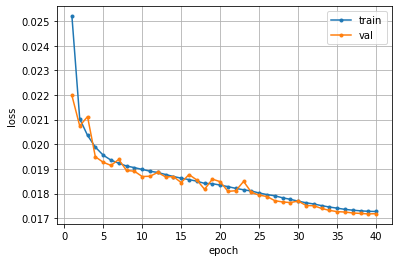

In [34]:
plot_history_train_val(learner.history, 'loss')

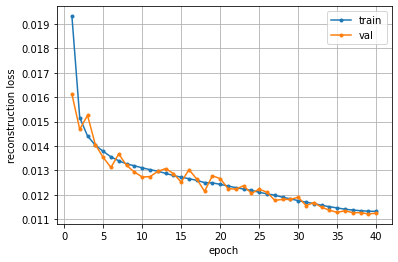

In [35]:
plot_history_train_val(learner.history, 'reconstruction loss')

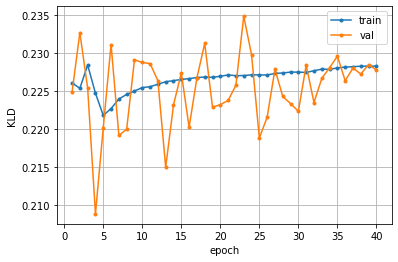

In [36]:
plot_history_train_val(learner.history, 'KLD')

## Testing

In [44]:
model.load_state_dict(torch.load(str(MODELS_DIR / 'final_model.pt')))

<All keys matched successfully>

In [45]:
model.eval();

Testing reconstruction

In [46]:
def reconstruct(model, batch, device):
    batch = batch.to(device)
    with torch.no_grad():
        reconstructed_batch = model(batch)[0]
    reconstructed_batch = reconstructed_batch.cpu()
    return reconstructed_batch

In [47]:
def show_2_batches(batch1, batch2, title1, title2):
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(121)
    plot_batch(ax, batch1, title1)

    ax = fig.add_subplot(122)
    plot_batch(ax, batch2, title2)
    plt.show()

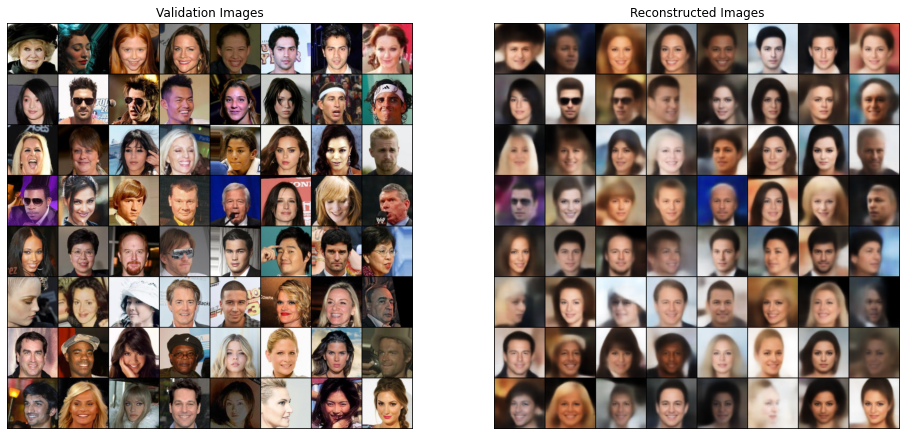

In [48]:
test_batch, _ = next(iter(val_loader))
reconstructed_batch = reconstruct(model, test_batch, DEVICE)
show_2_batches(test_batch[:64], reconstructed_batch[:64], "Validation Images", "Reconstructed Images")

Testing generation

In [57]:
sample_images = model.sample(64, (IMAGE_SIZE, IMAGE_SIZE), DEVICE, 2)

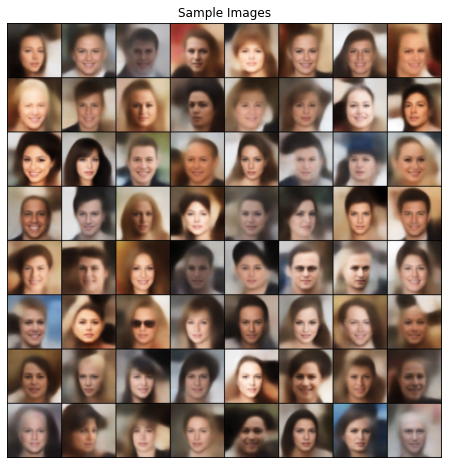

In [58]:
show_images(sample_images.cpu(), "Sample Images")

## Training with β=1

Reset model parameters

In [77]:
init_model(model)

In [78]:
loss = VAELoss(β=1.)

In [79]:
optimizer = get_optimizer(model, LEARNING_RATE, WEIGHT_DECAY)

In [80]:
lr_scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=LEARNING_RATE,
                                             steps_per_epoch=len(train_loader), epochs=EPOCHS)

In [81]:
learner = Learner(model, loss, optimizer, train_loader, val_loader, DEVICE, batch_scheduler=lr_scheduler)

In [82]:
learner.fit(EPOCHS)

1/40 - train: loss 0.021 reconstruction loss 0.018 KLD 0.684 ; val: loss 0.015 reconstruction loss 0.012 KLD 0.602 
2/40 - train: loss 0.015 reconstruction loss 0.011 KLD 0.593 ; val: loss 0.015 reconstruction loss 0.012 KLD 0.605 
3/40 - train: loss 0.013 reconstruction loss 0.010 KLD 0.588 ; val: loss 0.013 reconstruction loss 0.010 KLD 0.601 
4/40 - train: loss 0.013 reconstruction loss 0.010 KLD 0.589 ; val: loss 0.013 reconstruction loss 0.009 KLD 0.611 
5/40 - train: loss 0.012 reconstruction loss 0.009 KLD 0.597 ; val: loss 0.012 reconstruction loss 0.009 KLD 0.631 
6/40 - train: loss 0.012 reconstruction loss 0.009 KLD 0.606 ; val: loss 0.012 reconstruction loss 0.008 KLD 0.623 
7/40 - train: loss 0.012 reconstruction loss 0.009 KLD 0.612 ; val: loss 0.012 reconstruction loss 0.009 KLD 0.628 
8/40 - train: loss 0.012 reconstruction loss 0.008 KLD 0.617 ; val: loss 0.012 reconstruction loss 0.009 KLD 0.587 
9/40 - train: loss 0.012 reconstruction loss 0.008 KLD 0.620 ; val: loss

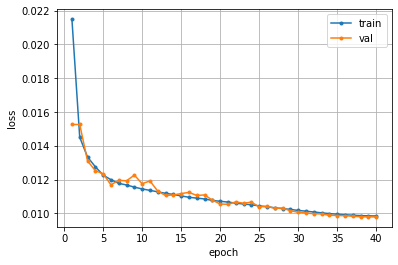

In [83]:
plot_history_train_val(learner.history, 'loss')

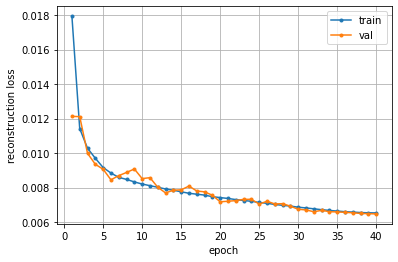

In [84]:
plot_history_train_val(learner.history, 'reconstruction loss')

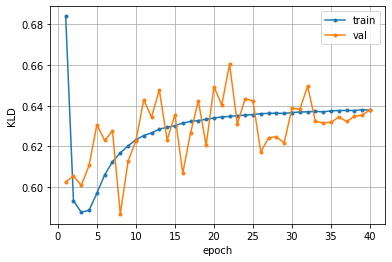

In [85]:
plot_history_train_val(learner.history, 'KLD')

Image generation

In [30]:
model.eval();

In [94]:
img_large = model.sample(1, (4*IMAGE_SIZE, 4*IMAGE_SIZE), DEVICE)

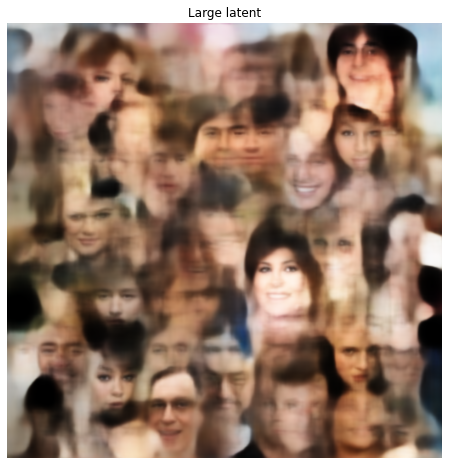

In [87]:
show_images(img_large.cpu(), "Large latent")